# Основы программирования в Python
*Алла Тамбовцева, НИУ ВШЭ*

## Семинар 2 (решения)

На этом семинаре мы будем работать с известной [базой данных](http://campus.lakeforest.edu/frank/FILES/MLFfiles/Bio150/Titanic/TitanicMETA.pdf) по пассажирам "Титаника" (она часто используется в курсах по эконометрике и машинному обучению, но представляет не только статистической, но и содержательный интерес).

*Переменные:*

**PassengerId**  - id пассажира

**Survived** - бинарный показатель, выжил пассажир или нет (1 - выжил, 0 - не выжил)

**Pclass** - класс пассажира

**Name** - имя пассажира 

**Sex**	- пол пассажира

**Age**	- возраст пассажира

**SibSp** - число родных братьев/сестер пассажира на борту корабля (или супругов) 

**Parch** - число родителей пассажира на борту корабля	

**Ticket**	- номер билета

**Fare** - стоимость билета

**Cabin** - каюта

**Embarked** - порт, в котором пассажир взошел на палубу корабля

### Загрузка и предварительная обработка

Загрузите базу данных из файла `Titanic.csv`.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/allatambov/Py-programming-3/master/28-05/Titanic.csv')

Загрузите базу данных так из файла еще раз, но так, чтобы столбец PassengerId был идентификатором, то есть номером  строки (*index)*.

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/allatambov/Py-programming-3/master/28-05/Titanic.csv',
                index_col = 0)
df.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


Удалите из базы строки с пропущенными значениями и сохраните изменения в самой базе.

In [5]:
df = df.dropna()

### Описание базы данных

Выведите сводную информацию по базе данных: какие переменные в ней есть, какого они типа + сколько заполненных наблюдений в каждой столбце.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 2 to 890
Data columns (total 11 columns):
Survived    183 non-null int64
Pclass      183 non-null int64
Name        183 non-null object
Sex         183 non-null object
Age         183 non-null float64
SibSp       183 non-null int64
Parch       183 non-null int64
Ticket      183 non-null object
Fare        183 non-null float64
Cabin       183 non-null object
Embarked    183 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 17.2+ KB


Выведите сводную статистическую информацию по каждому количественному показателю в базе (описательные статистике).

In [7]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,0.672131,1.191257,35.674426,0.464481,0.475410,78.682469
std,0.470725,0.515187,15.643866,0.644159,0.754617,76.347843
min,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000
max,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


Постройте гистограмму для переменной *Возраст* (*Age*), сделайте ее красного цвета, подпишите оси и добавьте заголовок графика.

In [8]:
# импортируем библиотеку для графики
import matplotlib

In [9]:
% matplotlib inline

# magic для того, чтобы график отображался прямо в ноутбуке ipynb

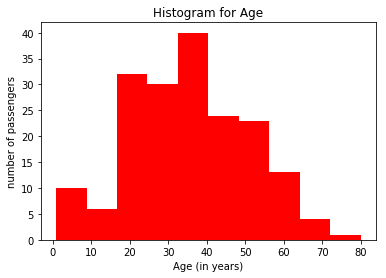

In [11]:
ax = df.Age.plot.hist(color = "red") # цвет red
ax.set_title('Histogram for Age') # заголовок для объекта ax
ax.set_xlabel('Age (in years)') # подпись для оси x
ax.set_ylabel('number of passengers') # подпись для оси y

Выведите описательные статистики для столбца *Стоимость билета* (*Fare*).

In [12]:
df.Fare.describe()

count    183.000000
mean      78.682469
std       76.347843
min        0.000000
25%       29.700000
50%       57.000000
75%       90.000000
max      512.329200
Name: Fare, dtype: float64

### Работа со строками и столбцами базы

Выведите названия столбцов в базе данных в виде списка (объект типа *list*).

In [13]:
list(df.columns)

['Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

Переименуйте столбец с классом пассажира из **Pclass** в **Class**.

In [14]:
cols = list(df.columns) # сохраним список
cols[1] = 'Class' # изменим нужный элемент в списке
df.columns = cols # поменяем столбцы в базе
df.head(3) # первые 3 строки

,Survived,Class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


Выберите из базы данных все строки, которые соответствуют пассажирам женского пола, и сохраните их в новую базу `female`.

In [17]:
female = df[df.Sex == 'female'] # двойное =
female.head(3)

,Survived,Class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S


Выберите из базы данных все строки, которые соответствуют выжившим пассажирам мужского пола младше 32 лет, и сохраните их в базу `Ymale`.

In [21]:
# обратите внимание на круглые скобки вокруг каждого условия - они необходимы!
# одновременное выполнение условий - поэтому &

Ymale = df[(df.Survived == 1) & (df.Sex == 'male') & (df.Age < 32)]
Ymale.head()

,Survived,Class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
24,1,1,"Sloper, Mr. William Thompson",male,28.00,0,0,113788,35.5000,A6,S
98,1,1,"Greenfield, Mr. William Bertram",male,23.00,0,1,PC 17759,63.3583,D10 D12,C
184,1,2,"Becker, Master. Richard F",male,1.00,2,1,230136,39.0000,F4,S
194,1,2,"Navratil, Master. Michel M",male,3.00,1,1,230080,26.0000,F2,S
306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S


Выберите из базы данных все строки, которые соответствуют пассажирам 1 или 2 класса.

In [24]:
# здесь одно из условий верно, или 1, или 2 класс, поэтому |
# одновременно быть в 1 и 2 классе невозможно

class1_2 = df[(df.Class == 1) | (df.Class == 2)]
class1_2.head()

,Survived,Class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S


Выберите из базы данных все строки, которые соответствуют выжившим пассажирам 1 или 2 класса.

In [26]:
# обратите внимание на порядок круглых скобок: здесь как в арифметике - учитывается порядок действий

surv1_2 = df[(df.Survived == 1) & ((df.Class == 1) | (df.Class == 2))]
surv1_2.head()

,Survived,Class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S


Добавьте в датафрейм столбец *Female*, состоящий из значений 0 и 1, где 1 соответствует пассажирам женского пола.

In [27]:
# сначала проверяем условие через ==, получаем набор из True и False
# потом в списковом включении преобразуем логический тип в целочисленный (int)

df['Female'] = [int(s) for s in df.Sex == 'female']
df.head(3)

,Survived,Class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Female
PassengerId,,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0


### Группировка 
Выведите на экран все уникальные значения в столбце *Embarked*.

In [28]:
df.Embarked.unique() # array - массив, не список

array(['C', 'S', 'Q'], dtype=object)

Сгруппируйте строки в датафрейме в соответствии со значениями переменной *Survived* и выведите средние значения всех количественных переменных по группам.

In [29]:
# сначала группируем
# потом получаем сводную информацию по агрегированным данным - задаем функцию mean для среднего

df.groupby('Survived').agg('mean')

,Class,Age,SibSp,Parch,Fare,Female
Survived,,,,,,
0,1.216667,41.350000,0.366667,0.450000,64.048262,0.100000
1,1.178862,32.905854,0.512195,0.487805,85.821107,0.666667


Сгруппируйте строки в датафрейме в соответствии со значениями переменной *Sex* и сохраните в отдельный датафрейм таблицу со средними и медианными значениями переменной *Age* по группам (мужчины и женщины).

In [32]:
# сначала группируем по Sex
# потом забираем столбец Age
# применяем нужные функции в agg(их несколько - не забудьте оформить в виде списка)

age_agg = df.groupby('Sex').Age.agg(['mean', 'median'])
age_agg

,mean,median
Sex,,
female,32.676136,32.25
male,38.451789,37.00


### Выгрузка базы в файл
Приведите все названия столбцов в датафрейме к нижнему регистру и сохраните изменения.

In [34]:
df.columns = [c.lower() for c in df.columns]
df.head()

,survived,class,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,female
PassengerId,,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,1
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,1


Выгрузите итоговый датафрейм в файл `Titanic-new.csv`.

In [35]:
df.to_csv('Titanic-new.csv')